# Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Read CSV, Data inegrity check

In [3]:
data = pd.read_csv('./Paralympic_Medal_Count.csv')

In [4]:
data.head(10)

,Team/Npc,Gold,silver,bronze,total medals,rank by total
0,People's Republic of China,96,60,51,207,1
1,Great Britain,41,38,45,124,2
2,United States of America,37,36,31,104,4
3,RPC,36,33,49,118,3
4,Netherlands,25,17,17,59,9
5,Ukraine,24,47,27,98,5
6,Brazil,22,20,30,72,7
7,Australia,21,29,30,80,6
8,Italy,14,29,26,69,8
9,Azerbaijan,14,1,4,19,20


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team/Npc       86 non-null     object
 1   Gold           86 non-null     int64 
 2   silver         86 non-null     int64 
 3   bronze         86 non-null     int64 
 4   total medals   86 non-null     int64 
 5   rank by total  86 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.2+ KB


In [6]:
data.duplicated().value_counts()

False    86
dtype: int64

In [7]:
data.isna().any()

Team/Npc         False
Gold             False
silver           False
bronze           False
total medals     False
rank by total    False
dtype: bool

## Add continent to the dataframe, for further analysis

In [8]:
## lets classify these teams into a continent for further analysis purpose
conti={"People's Republic of China":"Asia", 'Great Britain':'Europe',
       'United States of America':'North America', 'RPC':'Europe and Asia', 'Netherlands':'Europe', 'Ukraine':'Europe',
       'Brazil':'South America', 'Australia':'Oceania', 'Italy':'Europe', 'Azerbaijan':'Europe and Asia', 'Japan':'Asia', 'Germany':'Europe',
       'Islamic Republic of Iran':'Asia', 'France':'Europe', 'Spain':'Europe', 'Uzbekistan':'Asia',
       'Poland':'Europe', 'Hungary':'Europe', 'Switzerland':'Europe', 'Mexico':'North America', 'New Zealand':'Oceania',
       'Israel':'Asia', 'Canada':'North America', 'India':'Asia', 'Thailand':'Asia', 'Slovakia':'Europe', 'Belarus':'Europe',
       'Tunisia':'Africa', 'Algeria':'Africa', 'Morocco':'Africa', 'Belgium':'Europe', 'Ireland':'Europe', 'Nigeria':'Africa',
       'South Africa':'Africa', 'Cuba':'North America', 'Jordan':'Asia', 'Colombia':'South America', 'Venezuela':'South America',
       'Malaysia':'Asia', 'Denmark':'Europe', 'Republic of Korea':'Asia', 'Turkey':'Europe and Asia', 'Indonesia':'Asia',
       'Czech Republic':'Europe', 'Chile':'South America', 'Serbia':'Europe', 'Norway':'Europe', 'Singapore':'Asia',
       'Austria':'Europe', 'Sweden':'Europe', 'Greece':'Europe', 'Finland':'Europe', 'Kazakhstan':'Europe and Asia',
       'United Arab Emirates':'Asia', 'Costa Rica':'North America', 'Ecuador':'South America', 'Cyprus':'Europe',
       'Sri Lanka':'Asia', 'Ethiopia':'Africa', 'Mongolia':'Asia', 'Pakistan':'Asia', 'Peru':'South America',
       'Argentina':'South America', 'Egypt':'Africa and Asia', 'Croatia':'Europe', 'Latvia':'Europe', 'Georgia':'Europe and Asia',
       'Hong Kong, China':'Asia', 'Bulgaria':'Europe', 'Iraq':'Asia', 'Kuwait':'Asia', 'Namibia':'Africa',
       'Romania':'Europe', 'Slovenia':'Europe', 'Vietnam':'Asia', 'Lithuania':'Europe', 'Portugal':'Europe',
       'Bosnia and Herzegovina':'Europe', 'El Salvador':'North America', 'Kenya':'Africa', 'Saudi Arabia':'Asia',
       'Montenegro':'Europe', 'Oman':'Asia', 'Qatar':'Asia', 'Chinese Taipei':'Asia', 'Uganda':'Africa'}
## put this dictionary into another column (creating new column named; Continent)
data['Continent'] = data['Team/Npc'].replace(conti)
data.head(3)

,Team/Npc,Gold,silver,bronze,total medals,rank by total,Continent
0,People's Republic of China,96,60,51,207,1,Asia
1,Great Britain,41,38,45,124,2,Europe
2,United States of America,37,36,31,104,4,North America


# Perfrom EDA

## Total Count for each 'Gold', 'Silver' & 'Bronze' medal.

In [9]:
# we want to count for each medals, and we create a new df for medals only

medal = data[['Gold', 'silver', 'bronze']].sum().reset_index().rename(columns={'index': 'Medal', 0: 'Count'})

In [10]:
medal.head()

,Medal,Count
0,Gold,539
1,silver,540
2,bronze,589


In [11]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 8]})

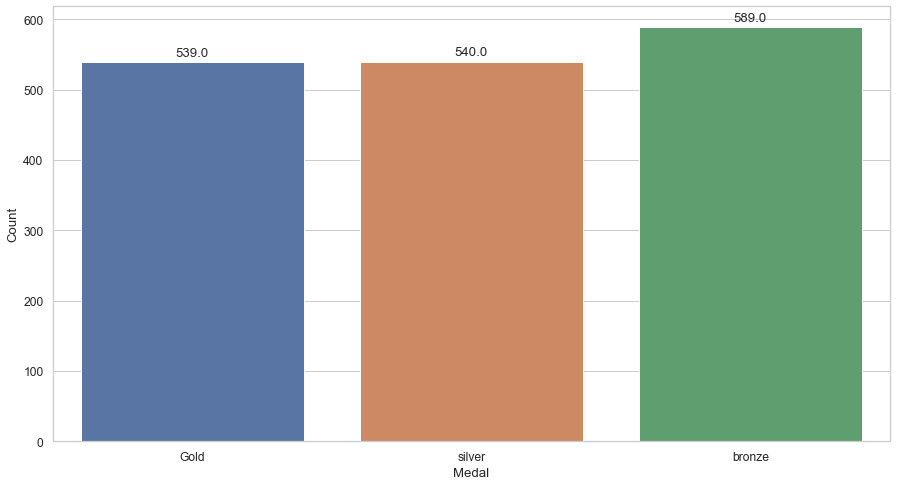

In [12]:
x = sns.barplot(x='Medal', y='Count', data=medal)

for p in x.patches:
    x.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


## Top 10 country that has total medals

In [13]:
top_10 = data.sort_values(by='total medals', ascending= False).reset_index().head(10)

In [14]:
top_10

,index,Team/Npc,Gold,silver,bronze,total medals,rank by total,Continent
0,0,People's Republic of China,96,60,51,207,1,Asia
1,1,Great Britain,41,38,45,124,2,Europe
2,3,RPC,36,33,49,118,3,Europe and Asia
3,2,United States of America,37,36,31,104,4,North America
4,5,Ukraine,24,47,27,98,5,Europe
5,7,Australia,21,29,30,80,6,Oceania
6,6,Brazil,22,20,30,72,7,South America
7,8,Italy,14,29,26,69,8,Europe
8,4,Netherlands,25,17,17,59,9,Europe
9,13,France,11,15,28,54,10,Europe


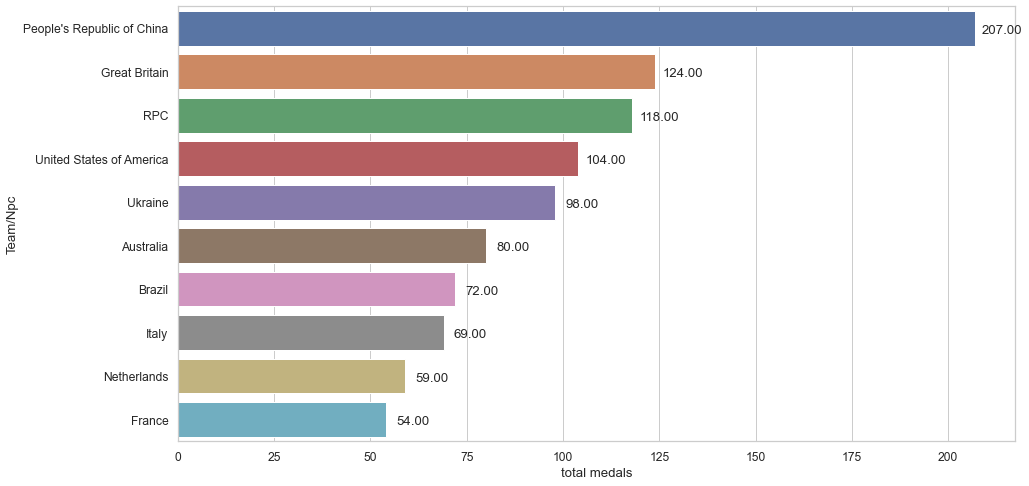

In [15]:
y = sns.barplot(x= 'total medals', y= 'Team/Npc', data= top_10)

for p in y.patches:
    width = p.get_width()
    plt.text(7+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

### Plotly Choropleth

In [20]:
fig = px.choropleth(top_10, 
                    locations = 'Team/Npc',
                    locationmode = 'country names',
                    color = 'total medals',
                    hover_name = 'Team/Npc',
                    color_continuous_scale = 'plasma',
                    animation_frame = 'Team/Npc',
                    hover_data = ['rank by total'],
                    labels = {'total medals':'Total Medals','Team/Npc':'Country','rank by total':'Rank'}
                    )
fig.update_layout(title = 'World Countries with Tokyo Paralympic Medals',
                  title_x = 0.5,
                  title_font = dict(size = 16, color = 'MidnightBlue'),
                  geo= dict(showframe = False,
                            showcoastlines = False,
                            projection_type = 'equirectangular'
                           ))

fig.show()


## Number of country joined the paralympics based on Continent

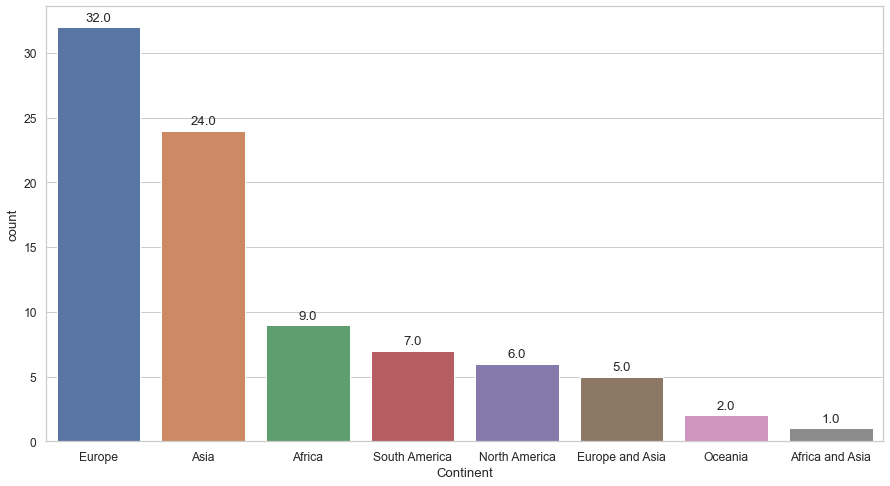

In [17]:
z = sns.countplot(x= 'Continent', data= data, order= data.Continent.value_counts().index)

for p in z.patches:
    z.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### We can see that Europe leading with 32 country joined the Paralympics, followed by Asia, 24 country and Africa, 9 country

## Total medals won by each Continent

In [18]:
cont_medal = data.groupby('Continent').agg({'total medals': 'sum'}).reset_index().sort_values(by='total medals', ascending= False)

cont_medal

,Continent,total medals
3,Europe,661
2,Asia,414
4,Europe and Asia,160
5,North America,156
7,South America,122
6,Oceania,92
0,Africa,56
1,Africa and Asia,7


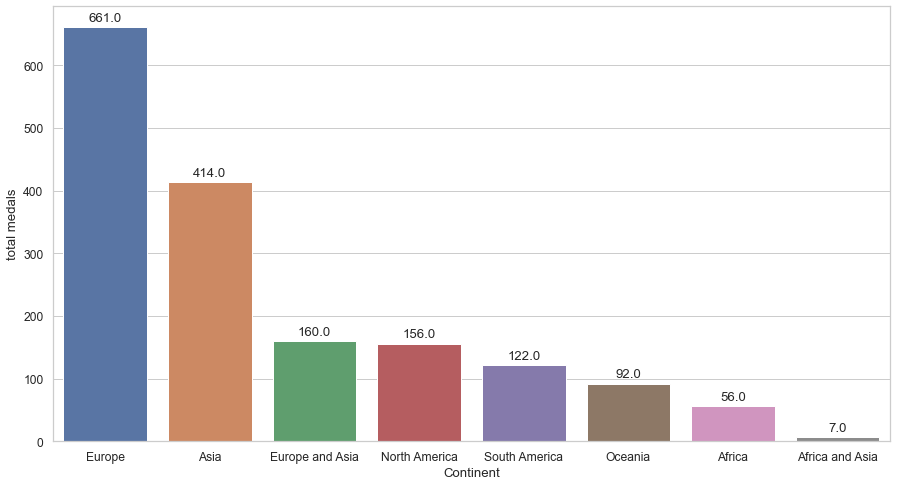

In [19]:
a = sns.barplot(x= 'Continent', y= 'total medals', data= cont_medal)

for p in a.patches:
    a.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [23]:
data.loc[data.Continent == 'Africa and Asia']

,Team/Npc,Gold,silver,bronze,total medals,rank by total,Continent
63,Egypt,0,5,2,7,41,Africa and Asia


### Europe still leading with total medals won by 661 medal, followed by Asia with 414 total medals and Europe Asia with 160 medal